<a href="https://colab.research.google.com/github/pratyush-pandey98/Transfer-learning/blob/master/Car_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [27]:
%tensorflow_version 2.x
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

TensorFlow is already loaded. Please restart the runtime to change versions.


In [28]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

#for layer in base_model.layers: 
#       layer.trainable = False

#OR

#x=no_of_layers     <= can be determined
#for layer in model.layers[:x]:
#    layer.trainable=False
#for layer in model.layers[x:]:
#    layer.trainable=True

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(3,activation='softmax')(x) #final layer with softmax activation

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


In [0]:
model=Model(inputs=base_model.input,outputs=preds)
#[224,224] rgb image input
#classification output

In [30]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator=train_datagen.flow_from_directory('/content/drive/My Drive/dataset_v2/train',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

val_generator=val_datagen.flow_from_directory('/content/drive/My Drive/dataset_v2/test',
                                                 target_size=(224,224),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)


Found 369 images belonging to 3 classes.
Found 93 images belonging to 3 classes.


In [31]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, None, None, 3)     0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128 

In [32]:
step_size_train=train_generator.n//train_generator.batch_size
step_size_val=val_generator.n//val_generator.batch_size
history= model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10,
                   validation_data=val_generator,
                   validation_steps=step_size_val)

Epoch 1/10
11/11 [==============================] - 107s 10s/step - loss: 1.2152 - acc: 0.6434 - val_loss: 1.5309 - val_acc: 0.6406
Epoch 2/10
11/11 [==============================] - 86s 8s/step - loss: 0.3328 - acc: 0.8836 - val_loss: 3.1220 - val_acc: 0.6393
Epoch 3/10
11/11 [==============================] - 86s 8s/step - loss: 0.1144 - acc: 0.9515 - val_loss: 1.0601 - val_acc: 0.8197
Epoch 4/10
11/11 [==============================] - 88s 8s/step - loss: 0.1092 - acc: 0.9631 - val_loss: 2.0316 - val_acc: 0.7812
Epoch 5/10
11/11 [==============================] - 86s 8s/step - loss: 0.2576 - acc: 0.9658 - val_loss: 5.4679 - val_acc: 0.6230
Epoch 6/10
11/11 [==============================] - 86s 8s/step - loss: 0.1492 - acc: 0.9583 - val_loss: 5.5814 - val_acc: 0.5738
Epoch 7/10
11/11 [==============================] - 83s 8s/step - loss: 0.1444 - acc: 0.9525 - val_loss: 4.5792 - val_acc: 0.5938
Epoch 8/10
11/11 [==============================] - 86s 8s/step - loss: 0.1161 - acc: 0.

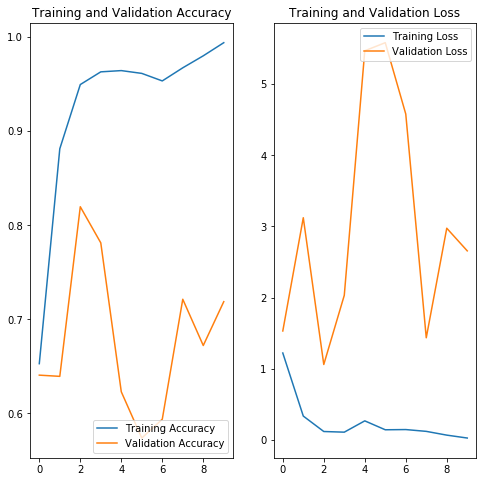

In [34]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [36]:
def load_image(img_path, show=False):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255.                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor

categories=['Honda','Hyundai','Mercedes']
img_path1 = '/content/drive/My Drive/t01.png'  #Image is Hyundai
new_image1 = load_image(img_path1)
pred1 = model.predict(new_image1)
categories[np.argmax(pred1)]

'Hyundai'

In [37]:
img_path2 = '/content/drive/My Drive/t02.png'  #Image is Mercedies
new_image2 = load_image(img_path2)
pred2 = model.predict(new_image2)
categories[np.argmax(pred2)]

'Mercedes'